In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

Load EEG data as raw mne file and display info

In [2]:
#raw = mne.io.read_raw_brainvision("dados\\SUBJ002\\SUBJ0002.vhdr") # EEG + other sensors channels
raw = mne.io.read_raw_eeglab("dados\\SUBJ002\\datasetSubj002.set") #only EEG
print(raw.info)

Reading dados\SUBJ002\datasetSubj002.fdt
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>


<ipython-input-2-bb0053073e25>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab("dados\\SUBJ002\\datasetSubj002.set") #only EEG


In [3]:
raw.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'Oz',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6',
 'TP9',
 'TP10',
 'POz',
 'F1',
 'F2',
 'C1',
 'C2',
 'P1',
 'P2',
 'AF3',
 'AF4',
 'FC3',
 'FC4',
 'CP3',
 'CP4',
 'PO3',
 'PO4',
 'F5',
 'F6',
 'C5',
 'C6',
 'P5',
 'P6',
 'AF7',
 'AF8',
 'FT7',
 'FT8',
 'TP7',
 'TP8',
 'PO7',
 'PO8',
 'FT9',
 'FT10',
 'Fpz',
 'CPz']

In [4]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

<RawEEGLAB | datasetSubj002.fdt, 63 x 3685720 (3685.7 s), ~88 kB, data not loaded>

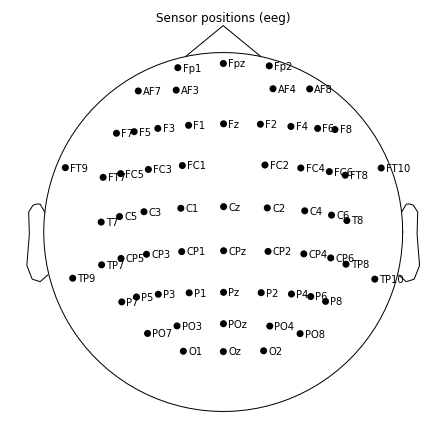

In [5]:
raw.plot_sensors(show_names = True);

Plot EEG signals

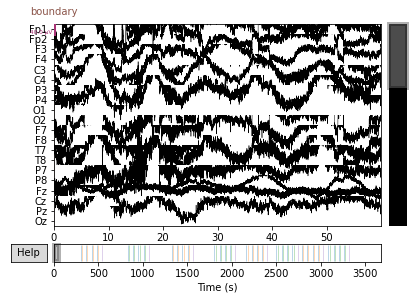

Reading 0 ... 3685719  =      0.000 ...  3685.719 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (16.501 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

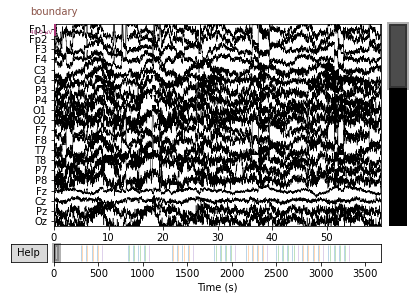

In [6]:
raw.plot(duration=60, n_channels=20, remove_dc=False);
#data, times = raw[raw.ch_names, 10000:310000]
filt_raw = raw.copy()
filt_raw.load_data()
filt_raw.filter(0.2,40)
filt_raw.notch_filter(np.arange(60, 241, 60))
filt_raw.plot(duration=60, n_channels=20, remove_dc=False);

Plot PSD of signals

In [4]:
raw['P3',:][0].shape

(1, 12403800)

Effective window size : 0.410 (s)


<ipython-input-5-48ec2fb00aee>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=250);


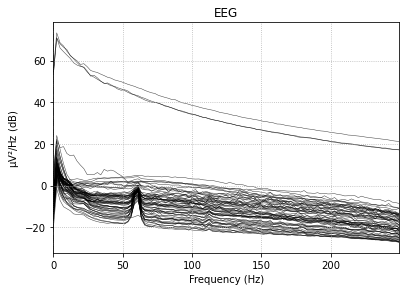

In [5]:
raw.plot_psd(fmax=250);

Extract data from raw object, pick all channels in a given range, filter it and plot them all

Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 165001 samples (33.000 sec)



C:\Users\Raffaela\anaconda3\envs\emocoes\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


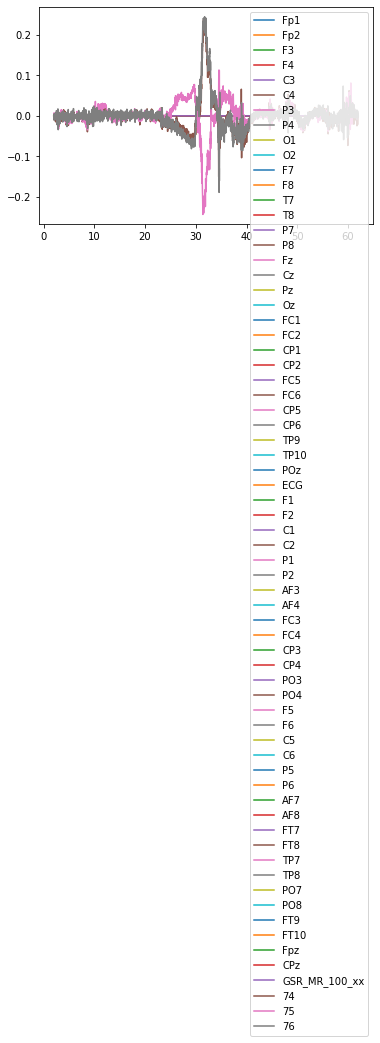

In [6]:
data, times = raw[raw.ch_names, 10000:310000]
data_filter = mne.filter.filter_data(data,raw.info['sfreq'],0.1,40)
plt.figure()
for ch in range(len(raw.ch_names)):
    plt.plot(times,data_filter[ch,:], label = raw.ch_names[ch])
plt.legend()

Pick a given channel in a given range, filter it and plot

In [7]:
raw_temp = raw.copy()
picks = raw_temp.pick_channels(['O2'])

Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 165001 samples (33.000 sec)



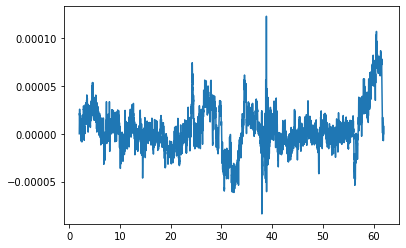

In [10]:
data, times = raw_temp[raw_temp.ch_names, 10000:310000]
data_filter = mne.filter.filter_data(data,raw_temp.info['sfreq'],0.1,40)
plt.figure()
plt.plot(times,data_filter[0,:])


In [6]:
raw_components = raw.copy()
picks = raw_components.pick_channels(['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8'])

Detect ECG artifacts

Using channel F3 to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Number of ECG events detected : 5300 (average pulse 86 / min.)
Not setting metadata
Not setting metadata
5300 matching events found
No baseline correction applied
Loading data for 5300 events and 1001 original time points ...
2 bad epochs dropped
Not setting metadata
Not setting metadata
5298 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


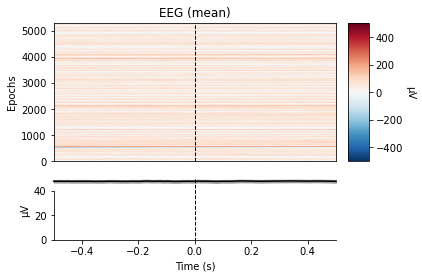

[<Figure size 432x288 with 3 Axes>]

In [7]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw_components, ch_name = 'F3')
ecg_epochs.plot_image(combine='mean')

In [8]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw)
eog_epochs.plot_image(combine='mean')
eog_epochs.average().plot_joint()

No EOG channels found
Trying with EEG 061 and EEG 062


RuntimeError: EEG 61 or EEG 62 channel not found !!

Apply ICA

In [7]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=14, random_state=97, max_iter=800)
ica.fit(filt_raw)
raw.load_data()

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 80.0s.
Reading 0 ... 3685719  =      0.000 ...  3685.719 secs...


<RawEEGLAB | datasetSubj002.fdt, 63 x 3685720 (3685.7 s), ~1.73 GB, data loaded>

Creating RawArray with float64 data, n_channels=9, n_times=3685720
    Range : 0 ... 3685719 =      0.000 ...  3685.719 secs
Ready.


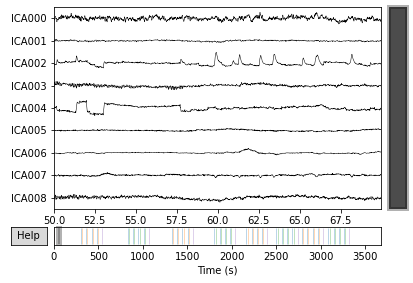

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
1842 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
1842 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
1842 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
1842 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
1842 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


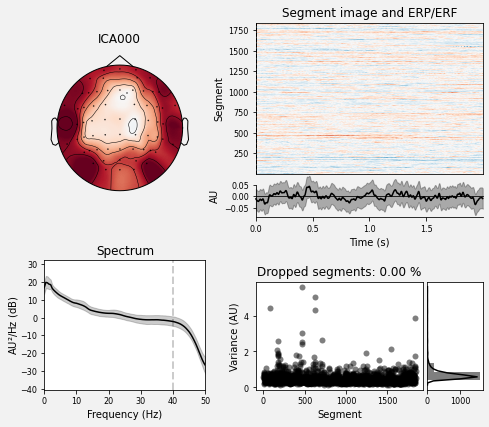

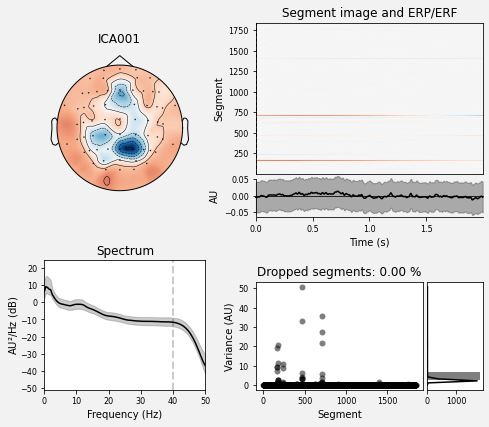

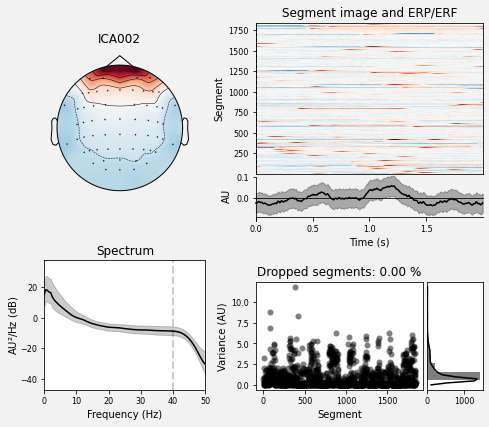

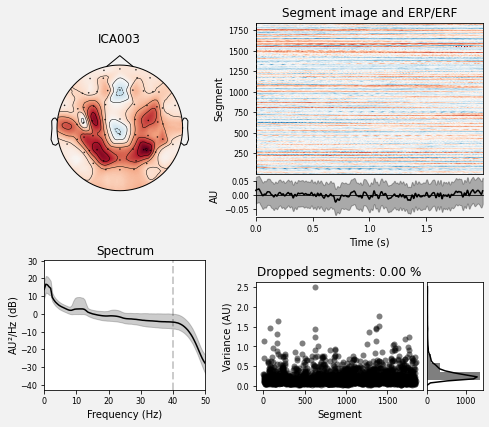

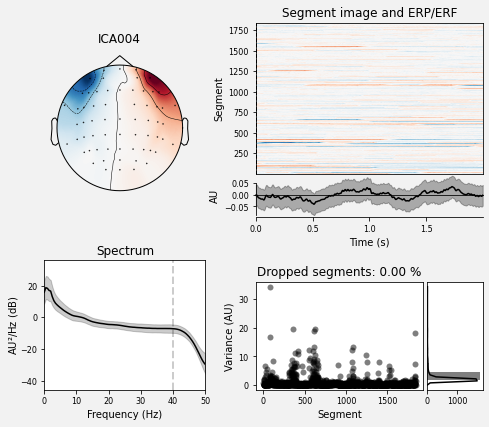

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [9]:
ica.plot_sources(filt_raw, [0,1,2,3,4,5,6,7,8], start=50,stop=70)
#ca.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(filt_raw)

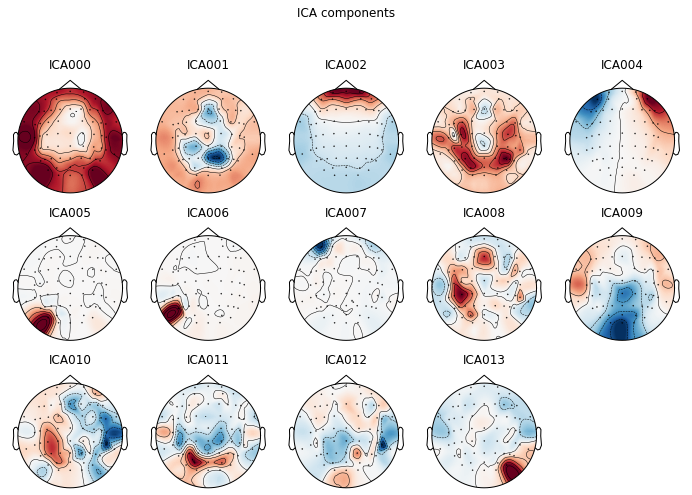

[<Figure size 702x508.68 with 14 Axes>]

In [11]:
ica.plot_components()

In [18]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>

Fica evidente que a terceira componente (002) se trata do oculograma e neste caso pode ser removida.